# Practical Work 6 - Logistic Regression

## Students
- Flavia Pittet
- Fabio Vitali


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ex 1 - Classification to predict student admission

### a. Logistic regression classifier with linear decision boundary

- In a similar way as for the exercise of the previous week, read the training data from file student-dataset-train.csv. The first two columns are x1 and x2. The last column holds the class label y. Build the design matrix X Check that the shape of X is (100,3) and that the shape of y is (100,).

In [2]:
trainSet = pd.read_csv("student-dataset-train.csv", header=None)
testSet = pd.read_csv("student-dataset-test.csv", header=None)

In [3]:
X0 = trainSet[0].values
X1 = trainSet[1].values
Y = trainSet[2].values

X = np.ones((X0.size, 3))
X.T[1] = X0
X.T[2] = X1
print("shape: ",X.shape, Y.shape)

shape:  (100, 3) (100,)


- Implement a z-norm normalization of the training set. You need to store the normalization values (µ, σ) for later as they will be needed to normalize the test set.

In [4]:
X0_avg = X0.mean()
X0_std = X0.std()
X1_avg = X1.mean()
X1_std = X1.std()

X0_norm = (X0 - X0_avg) / X0_std
X1_norm = (X1 - X1_avg) / X1_std

X_norm = np.ones_like(X)
X_norm.T[1] = X0_norm
X_norm.T[2] = X1_norm

- Implement a sigmoid function g(z) and plot it

In [5]:
def g(z):
    return 1/(1+np.exp(-z))

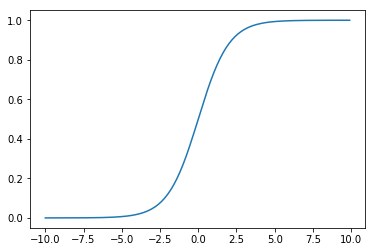

In [6]:
plt.plot(np.arange(-10,10,0.1), g(np.arange(-10,10,0.1)))

- Implement the hypothesis function h(x)

In [7]:
def hypothesis(X,theta):
    return g(X.dot(theta.T))  

- Implement the objective function J

In [8]:
def objective(X,y,theta):
    epsilon = 1e-6
    h = hypothesis(X,theta) 
    N = X.shape[0]
    tmp = y * np.log(h + epsilon) + (1-y) * np.log(1 - h + epsilon)
    return tmp.sum()/N

- Implement the gradient ascent

In [9]:
def gradientAscent(X,y, learning_rate, num_epoch):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.zeros(D)  # init thetas to some values
    
    J = []
    for i in range(0,num_epoch):
        h = hypothesis(X, theta)  #N dimension
        loss = y-h                    #N dimension
        gradient = X.T.dot(loss)
        theta = theta + learning_rate * (1.0/N) * gradient
        J.append(objective(X,y, theta))
    return theta, np.array(J)

- Test your implementation and plot the evolution of the cost J

In [10]:
theta, J = gradientAscent(X,Y, 1e-3, 2000000)

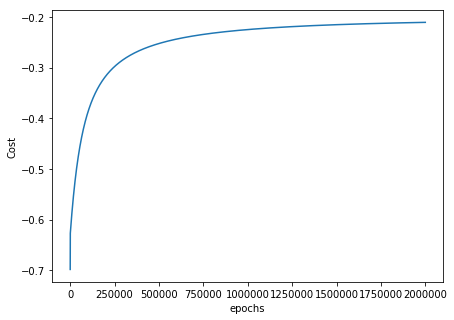

In [11]:
plt.figure(figsize=(7,5))
plt.xlabel("epochs")
plt.ylabel("Cost")
plt.plot(J)

- Compute the correct classification rate on student-dataset-test.csv

In [12]:
# Testing model's performance 

def test_perf(y_hat, y):
    correct = 0
    for yh, y in zip(y_hat,y):
        if yh == y:
            correct += 1
    return correct, len(y_hat) - correct


In [13]:
Xtest = np.ones_like(X)
Xtest.T[1] = testSet[0].values
Xtest.T[2] = testSet[1].values
Ytest = testSet[2].values

htest = hypothesis(Xtest, theta).round()
correct, miss = test_perf(htest.round(), Ytest)
print(correct, miss)

89 11


- Discuss performance

An error of 11% is an acceptable result considering the simplicity of the function. This result is the same as in the slides, so it's what we expected.

- Draw the decision boundary of your system on top of the scatter plot of the testing data

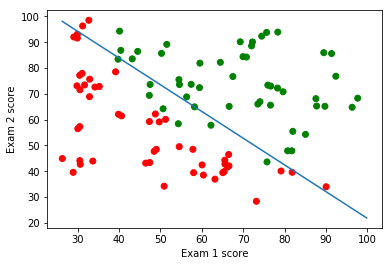

In [14]:
plt.clf()
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

plt.scatter(Xtest[:,1], Xtest[:,2], c=['r','g'])

plt.plot(np.arange(Xtest[:,1].min(), 100, 0.5), 
         [-(theta[0] + theta[1] * x) / theta[2] for x in np.arange(Xtest[:,1].min(), 100, 0.5)])

### c. Logistic regression classifier with non-linear decision boundary

In [15]:
X2 = np.ones((X0.size, 6))
X2.T[1] = X0
X2.T[2] = X1
X2.T[3] = X0**2
X2.T[4] = X1**2
X2.T[5] = X0*X1

In [16]:
theta2, J2 = gradientAscent(X2,Y, 1e-3, 200000)

In [17]:
print('theta:',theta2)

Xtest2 = np.ones_like(X2)
X0test = testSet[0].values
X1test = testSet[1].values
Xtest2.T[1] = X0test
Xtest2.T[2] = X1test
Xtest2.T[3] = X0test**2
Xtest2.T[4] = X1test**2
Xtest2.T[5] = X0test*X1test

htest2 = hypothesis(Xtest2, theta2).round()
correct, miss = test_perf(htest2, Ytest)
print('correct :',correct,'| missed: ', miss)

theta: [  -9.05417071 -262.64458236 -272.75776224    0.59949322    0.35345354
    9.54473665]
correct : 85 | missed:  15


- Discuss performance

Our guess was that a non-linear boundary would be more precise, but the results we get are the opposite. 
Most certainly, there is a mistake in our code, but we can't figure out why. The expected result should be around 95%

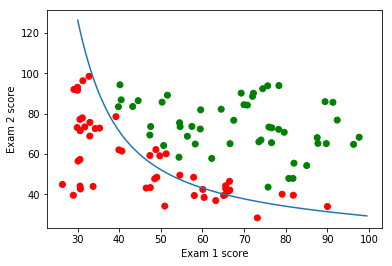

In [18]:
plt.clf()
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

plt.scatter(Xtest2[:,1], Xtest2[:,2], c=['r','g'])
plt.plot(np.arange(30, 100, 0.5), 
        [
            - (-np.sqrt((theta2[2] + theta2[5] * x)**2 - 4 * theta2[4] * (theta2[0] + 
            x * (theta2[1] + theta2[3] * x))) + theta2[2] + theta2[5] * x) / 
            (2 * theta2[4]) 
        for x in np.arange(30, 100, 0.5)])


### d. Using SciKit Learn

In [19]:
from sklearn import linear_model

In [20]:
clf = linear_model.SGDClassifier(loss='log',max_iter=1000000)
clf.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [21]:
Y_hat = clf.predict(Xtest)

In [22]:
correct, miss = test_perf(Y_hat, Ytest)
print(correct, miss)

88 12


- Discuss performance

  As SciKit creates a linear decision boundary, the result must be similar to what we got previously for the linear boundary, which is the case. 
